<a href="https://colab.research.google.com/github/ascle/colab_tcc2/blob/dev/5_modelagem-classificacao_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importando bibliotecas<hr style='border: 2px solid red;'>


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

### Outras configurações<hr style='border: 2px solid red;'>



In [2]:
!pip install ipython-autotime
pd.set_option('display.max_columns', None)
%load_ext autotime

SEED = 7
np.random.seed(SEED)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.4 MB/s eta 0:00:00
time: 704 µs (started: 2023-09-19 03:39:17 +00:00)


### Conectando no ambiente que será utilizado<hr style='border: 2px solid red;'>


In [3]:
# Importando do Drive
from google.colab import drive
from os import chdir

drive.mount('/content/drive', force_remount=True)
chdir('/content/drive/MyDrive/UFS/tcc-2-ascle-ufs/bases/linkage_marco/')

Mounted at /content/drive
time: 21.7 s (started: 2023-09-19 03:39:17 +00:00)


#### Leitura dos dados

In [4]:
data_raw = pd.read_csv('dn_etl.csv', sep=';', low_memory=False)
data_raw.sort_index(axis=1, inplace=True)

time: 2 s (started: 2023-09-19 03:39:39 +00:00)


In [5]:
data_raw.shape

(190020, 24)

time: 3.51 ms (started: 2023-09-19 03:39:41 +00:00)


In [6]:
data_raw.head()

,ANO,APGAR1,APGAR5,CODANOMAL_QTD,CONSPRENAT,ESCMAEETL_VALOR,ESTCIVMAE_COMPANHEIRO,GRAVIDEZ_VALOR,LOCNASC_DOMICILIO,LOCNASC_ESTAB_SAUDE,LOCNASC_HOSPITAL,LOCNASC_OUTROS,OBT_NEONATAL,PARTO_CESAREO,PARTO_VAGINALL,PESO,QTDFILMORT,QTDPARTCES,SEMAGESTAC,SEXO_FEM,SEXO_MASC,TPAPRESENT_CEFALICO,TPAPRESENT_PELVICO,TPAPRESENT_TRANSVERSA
0,2015,2.0,4.0,0.0,5.0,1,0,1,0,0,1,0,0,1,0,820.0,1.0,NaN,26.0,0,1,1,0,0
1,2015,9.0,10.0,0.0,8.0,4,1,1,0,0,1,0,0,1,0,4200.0,1.0,NaN,39.0,0,1,1,0,0
2,2015,7.0,8.0,0.0,10.0,11,1,1,0,0,1,0,0,0,1,3700.0,0.0,0.0,40.0,1,0,1,0,0
3,2015,7.0,8.0,0.0,7.0,4,0,1,0,0,1,0,0,0,1,3550.0,1.0,0.0,37.0,0,1,1,0,0
4,2015,9.0,10.0,0.0,3.0,11,0,1,0,0,1,0,0,1,0,3800.0,0.0,NaN,39.0,1,0,1,0,0


time: 43.1 ms (started: 2023-09-19 03:39:41 +00:00)


## Dados X e y<hr style='border: 2px solid red;'>

In [7]:
X_raw= data_raw.drop(columns=['QTDPARTCES', 'ANO', 'OBT_NEONATAL'])
y_raw= data_raw["OBT_NEONATAL"]

time: 22.7 ms (started: 2023-09-19 03:40:12 +00:00)


## Dados desbalanceados<hr style='border: 2px solid red;'>

https://imbalanced-learn.org/stable/introduction.html

https://medium.com/data-hackers/como-lidar-com-dados-desbalanceados-em-problemas-de-classifica%C3%A7%C3%A3o-17c4d4357ef9

https://medium.com/turing-talks/dados-desbalanceados-o-que-s%C3%A3o-e-como-evit%C3%A1-los-43df4f49732b

https://www.teses.usp.br/teses/disponiveis/55/55134/tde-06012016-145045/publico/VictorHugoBarella_dissertacao_revisada.pdf

https://www.hashtagtreinamentos.com/datasets-desbalanceados-ciencia-dados


In [8]:
from imblearn.over_sampling import SMOTE

time: 442 ms (started: 2023-09-19 03:40:16 +00:00)


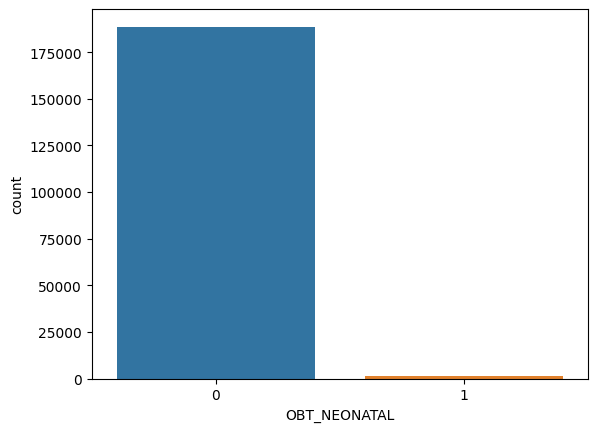

time: 249 ms (started: 2023-09-19 03:40:17 +00:00)


In [9]:
ax = sns.countplot(x='OBT_NEONATAL', data=data_raw)

#### Oversampling Smote

https://arxiv.org/abs/1106.1813

Consiste em criar observações intermediárias entre dados parecidos

In [10]:
smt = SMOTE(random_state=SEED)
X_bal, y_bal = smt.fit_resample(X_raw, y_raw)

time: 395 ms (started: 2023-09-19 03:40:20 +00:00)


In [11]:
data_bal = pd.concat([X_bal, y_bal], axis=1)

time: 47.9 ms (started: 2023-09-19 03:40:20 +00:00)


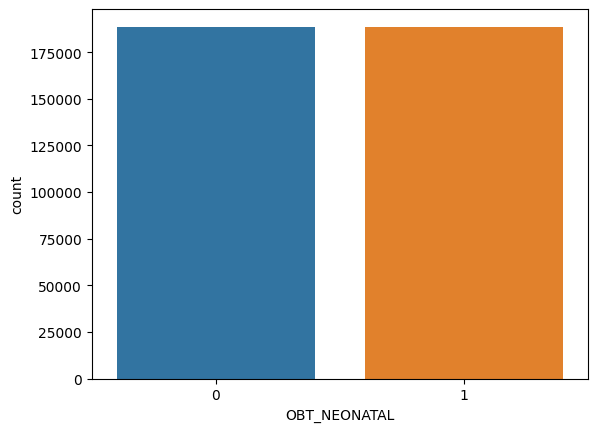

time: 333 ms (started: 2023-09-19 03:40:22 +00:00)


In [12]:
ax = sns.countplot(x='OBT_NEONATAL', data=data_bal)

##Dados de treino e de teste<hr style='border: 2px solid red;'>

In [13]:
from sklearn.model_selection import train_test_split

time: 511 µs (started: 2023-09-19 03:40:25 +00:00)


In [14]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_bal, y_bal, test_size =0.3,
                                                        random_state=SEED,
                                                        shuffle=True,
                                                        stratify=y_bal)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(X_treino), len(X_teste)))
print()

Treinaremos com 264068 elementos e testaremos com 113172 elementos

time: 486 ms (started: 2023-09-19 03:40:26 +00:00)


### Métodos auxiliares

In [15]:
def imprimir_metricas(_nome_modelo, _predito):
  print("A Acurácia do modelo {} foi {:.2f}%".format(_nome_modelo, (accuracy_score(y_teste, _predito) * 100)))
  print("A Precisão do modelo {} foi {:.2f}%".format(_nome_modelo, (precision_score(y_teste, _predito) * 100)))
  print("A Recall do modelo {} foi {:.2f}%".format(_nome_modelo, (recall_score(y_teste, _predito) * 100)))
  print("A F1 do modelo {} foi {:.2f}%".format(_nome_modelo, (f1_score(y_teste, _predito) * 100)))
  print()

time: 932 µs (started: 2023-09-19 03:40:29 +00:00)


In [16]:
def imprime_metrica_cv(_nome_modelo, _results):
    media = _results['test_score'].mean()
    desvio_padrao = _results['test_score'].std()
    ini = (media - 2 * desvio_padrao)*100
    fim = (media + 2 * desvio_padrao) * 100
    print("A Sensibilidade do modelo {} com Cross Validation foi  [{:.2f}%, {:.2f}%]".format(_nome_modelo, ini, fim))
    print()

time: 1.44 ms (started: 2023-09-19 03:40:30 +00:00)


In [17]:
  def tab_treino_teste_cv(max_depth, results):
    train_score = results['train_score'].mean() * 100
    test_score = results['test_score'].mean() * 100
    tabela = [max_depth, train_score, test_score]
    return tabela

time: 736 µs (started: 2023-09-19 03:40:33 +00:00)


## Modelos Hiper Parâmetros <hr style='border: 2px solid red;'>

### Árvore de Decisão Cross Validate Max-depht

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_validate

time: 741 µs (started: 2023-09-19 03:52:08 +00:00)


In [19]:
def rodar_arvore_decisao(max_depth):
  cv = StratifiedKFold(n_splits = 10, shuffle=True)
  modelo_dtc_cv = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo_dtc_cv, X_treino, y_treino, cv = cv, scoring='recall', return_train_score=True)

  return tab_treino_teste_cv(max_depth, results)

time: 729 µs (started: 2023-09-19 03:47:15 +00:00)


In [ ]:
resultados = [rodar_arvore_decisao(i) for i in range (1, 24)]
resultados = pd.DataFrame(resultados, columns = ["max_depth", "train", "test"])

time: 7min 19s (started: 2023-09-06 14:51:32 +00:00)


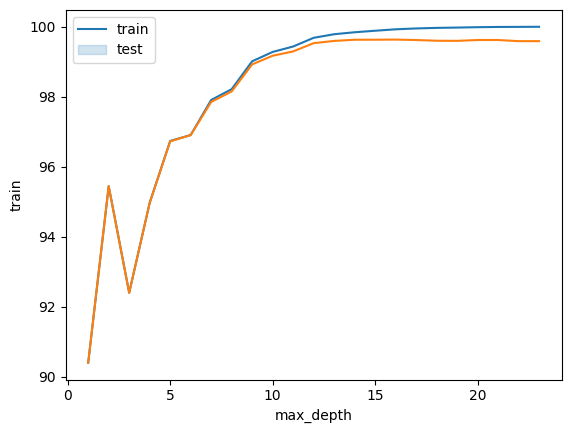

time: 758 ms (started: 2023-09-06 14:58:52 +00:00)


In [ ]:
sns.lineplot(x = "max_depth", y = "train", data = resultados)
sns.lineplot(x = "max_depth", y = "test", data = resultados)
plt.legend(["train", "test"])

#### Busca no espaço de parâmetros

In [25]:
from scipy.stats import randint

time: 583 µs (started: 2023-09-19 04:08:16 +00:00)


In [26]:
espaco_de_parametros = {
    "max_depth" : [4, 7, 10, 13, 16, 19],
    "min_samples_split" : randint(32, 128),
    "min_samples_leaf" : randint(32, 128),
    "criterion": ["gini", "entropy"]
}

time: 3.54 ms (started: 2023-09-19 04:09:20 +00:00)


In [28]:
busca = RandomizedSearchCV(DecisionTreeClassifier(),
                           espaco_de_parametros,
                           n_iter = 25,
                           cv = StratifiedKFold(n_splits = 5, shuffle=True),
                           random_state = SEED)

busca.fit(X_treino, y_treino)
resultados = pd.DataFrame(busca.cv_results_)

time: 3min 24s (started: 2023-09-19 04:16:00 +00:00)


In [29]:
scores = cross_val_score(busca, X_treino, y_treino, cv = StratifiedKFold(n_splits=5, shuffle=True), scoring='recall')
print(scores)
print(busca.best_estimator_)

[0.99098724 0.98924528 0.99098724 0.98894191 0.99038134]
DecisionTreeClassifier(criterion='entropy', max_depth=16, min_samples_leaf=51,
                       min_samples_split=65)
time: 12min 37s (started: 2023-09-19 04:19:25 +00:00)


### Random Forest Max deph

In [ ]:
def rodar_random_forest(max_depth):
  cv = StratifiedKFold(n_splits = 10, shuffle=True)
  modelo_rf_cv = RandomForestClassifier(n_estimators = 100, max_depth=max_depth)
  results = cross_validate(modelo_rf_cv, X_treino, y_treino, cv = cv, scoring='recall', return_train_score=True)

  return tab_treino_teste_cv(max_depth, results)

time: 898 µs (started: 2023-09-06 14:58:52 +00:00)


In [ ]:
resultados = [rodar_random_forest(i) for i in range (1, 24)]
resultados = pd.DataFrame(resultados, columns = ["max_depth", "train", "test"])

time: 1h 57min 29s (started: 2023-09-06 14:58:52 +00:00)


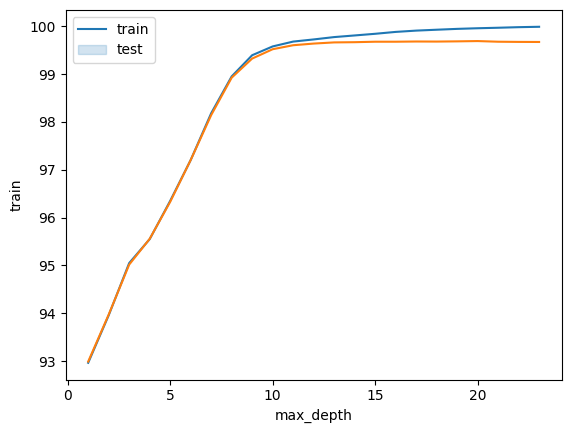

time: 352 ms (started: 2023-09-06 16:56:22 +00:00)


In [ ]:
sns.lineplot(x = "max_depth", y = "train", data = resultados)
sns.lineplot(x = "max_depth", y = "test", data = resultados)
plt.legend(["train", "test"])